<a href="https://colab.research.google.com/github/atahsz30/AtomicNatureOfMatter/blob/main/USCodeDS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import label_binarize



In [7]:
# Drive
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Data Transfer/UNSW_NB15_training-set.csv')
# Local
# df = pd.read_csv('UNSW_NB15_training-set.csv')

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [9]:
df.groupby(['attack_cat']).size()

,0
attack_cat,
Analysis,2000
Backdoor,1746
DoS,12264
Exploits,33393
Fuzzers,18184
Generic,40000
Normal,56000
Reconnaissance,10491
Shellcode,1133


In [10]:
df.groupby(['label']).size()

,0
label,
0,56000
1,119341


<Axes: >

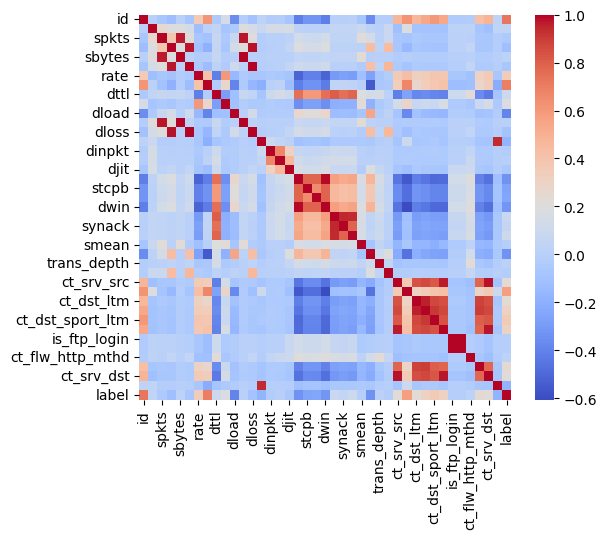

In [11]:
dd = df.drop(['proto', 'service', 'state', 'attack_cat'],axis= 1)
plt.figure(figsize=(6,5))
sns.heatmap(dd.corr(), cmap='coolwarm',)

In [12]:
X = df.drop(['proto', 'service', 'state', 'attack_cat', 'label'],axis= 1)
X

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,1,0.121478,6,4,258,172,74.087490,252,254,1.415894e+04,...,1,1,1,1,0,0,0,1,1,0
1,2,0.649902,14,38,734,42014,78.473372,62,252,8.395112e+03,...,1,1,1,2,0,0,0,1,6,0
2,3,1.623129,8,16,364,13186,14.170161,62,252,1.572272e+03,...,2,1,1,3,0,0,0,2,6,0
3,4,1.681642,12,12,628,770,13.677108,62,252,2.740179e+03,...,2,1,1,3,1,1,0,2,1,0
4,5,0.449454,10,6,534,268,33.373826,254,252,8.561499e+03,...,2,2,1,40,0,0,0,2,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,...,24,24,13,24,0,0,0,24,24,0
175337,175338,0.505762,10,8,620,354,33.612649,254,252,8.826286e+03,...,1,1,1,2,0,0,0,1,1,0
175338,175339,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,...,3,3,3,13,0,0,0,3,12,0
175339,175340,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,...,30,30,14,30,0,0,0,30,30,0


In [13]:
le = LabelEncoder()
y = le.fit_transform(df['attack_cat'])
y = pd.DataFrame(data=y, columns=['class'])
y

,class
0,6
1,6
2,6
3,6
4,6
...,...
175336,5
175337,8
175338,5
175339,5


In [14]:
le.classes_

array(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Shellcode', 'Worms'], dtype=object)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
X_train /= X_train.max()
X_test /= X_test.max()
# sclar = StandardScaler()
# X_train = sclar.fit_transform(X_train)
# X_test = sclar.transform(X_test)
# len(X_test)


In [17]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)
y_score = model.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.30      0.07      0.11       378
           1       0.11      0.06      0.08       349
           2       0.18      0.11      0.14      2466
           3       0.62      0.54      0.58      6760
           4       0.36      0.64      0.46      3613
           5       0.97      0.98      0.97      7962
           6       0.97      0.96      0.97     11076
           7       0.76      0.34      0.47      2185
           8       0.10      0.33      0.16       250
           9       0.33      0.13      0.19        30

    accuracy                           0.73     35069
   macro avg       0.47      0.42      0.41     35069
weighted avg       0.75      0.73      0.73     35069



In [18]:
def plot_confusion_matirix(model_name):
    conf = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f' Confusion Matrix of {model_name} for NF-UNSW-NB15')

In [19]:
def plot_roc(model_Name):
    fpr, tpr, roc_auc = {}, {}, {}
    y_test_bin = label_binarize(y_test, classes=list(range(10)))
    for i in range(10):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    plt.figure(figsize=(8, 6))
    for i in range(10):
        plt.plot(fpr[i], tpr[i], label=f'{le.classes_[i]} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_Name} ROC Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()


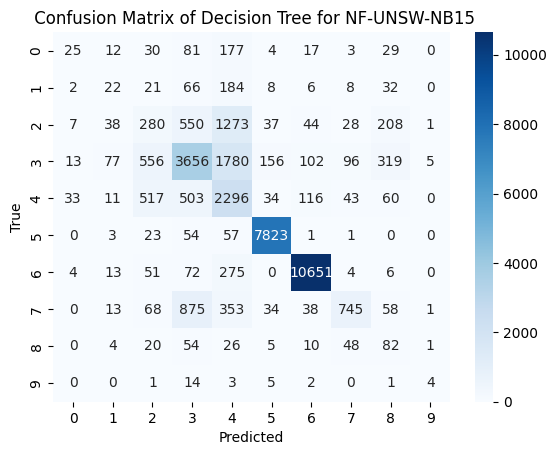

In [20]:
plot_confusion_matirix('Decision Tree')

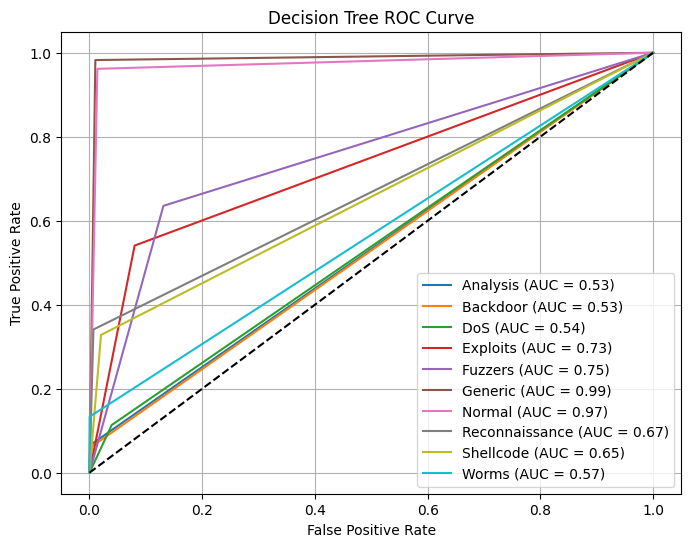

In [21]:
plot_roc('Decision Tree')

In [22]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)
y_score = model.predict_proba(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.52      0.11      0.18       378
           1       0.34      0.06      0.11       349
           2       0.27      0.28      0.28      2466
           3       0.60      0.73      0.66      6760
           4       0.65      0.64      0.64      3613
           5       1.00      0.98      0.99      7962
           6       0.95      0.94      0.94     11076
           7       0.61      0.50      0.55      2185
           8       0.52      0.09      0.15       250
           9       0.40      0.07      0.11        30

    accuracy                           0.78     35069
   macro avg       0.59      0.44      0.46     35069
weighted avg       0.78      0.78      0.77     35069



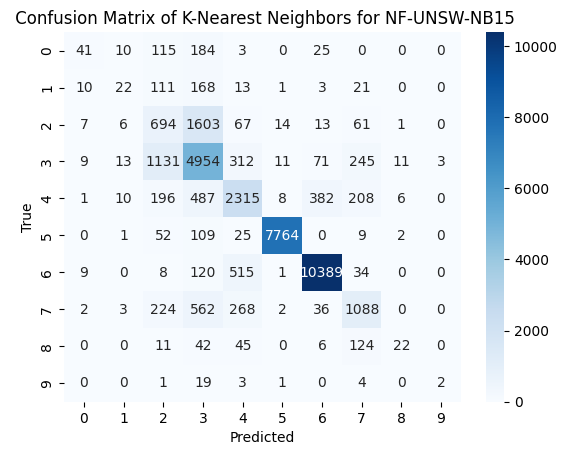

In [23]:
plot_confusion_matirix('K-Nearest Neighbors')

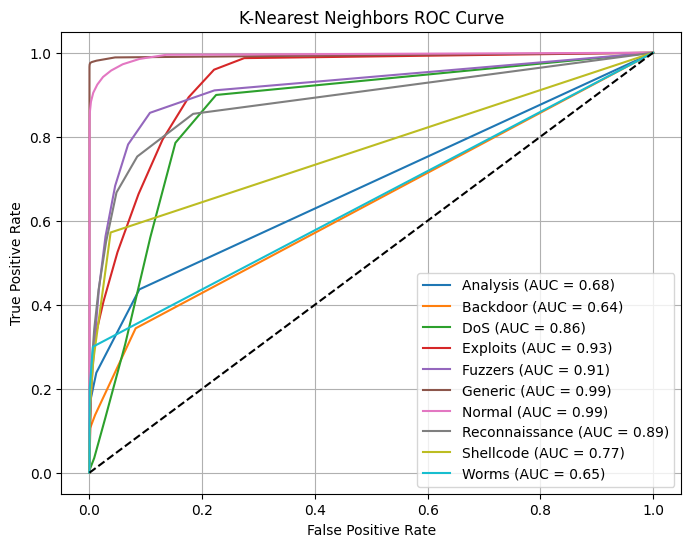

In [24]:
plot_roc('K-Nearest Neighbors')

In [25]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)
y_score = model.predict_proba(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.74      0.07      0.12       378
           1       0.00      0.00      0.00       349
           2       0.33      0.14      0.19      2466
           3       0.58      0.79      0.67      6760
           4       0.56      0.57      0.56      3613
           5       0.97      0.97      0.97      7962
           6       0.92      0.90      0.91     11076
           7       0.53      0.56      0.55      2185
           8       0.00      0.00      0.00       250
           9       0.00      0.00      0.00        30

    accuracy                           0.76     35069
   macro avg       0.46      0.40      0.40     35069
weighted avg       0.75      0.76      0.74     35069



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

<Axes: >

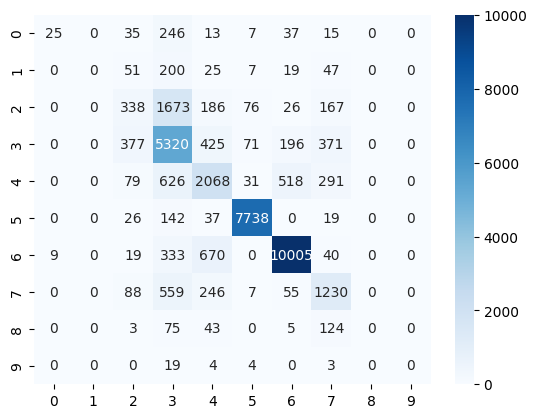

In [26]:
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')

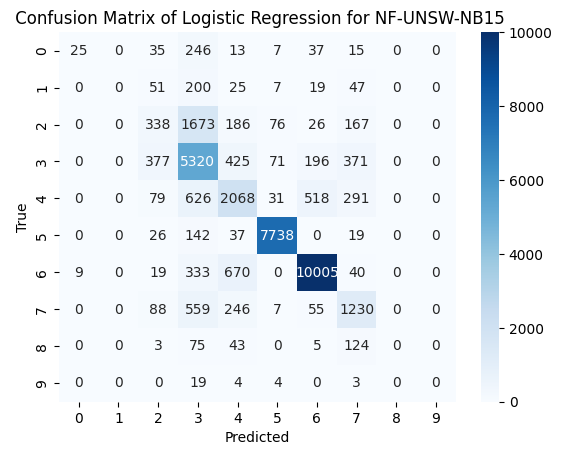

In [27]:
plot_confusion_matirix('Logistic Regression')

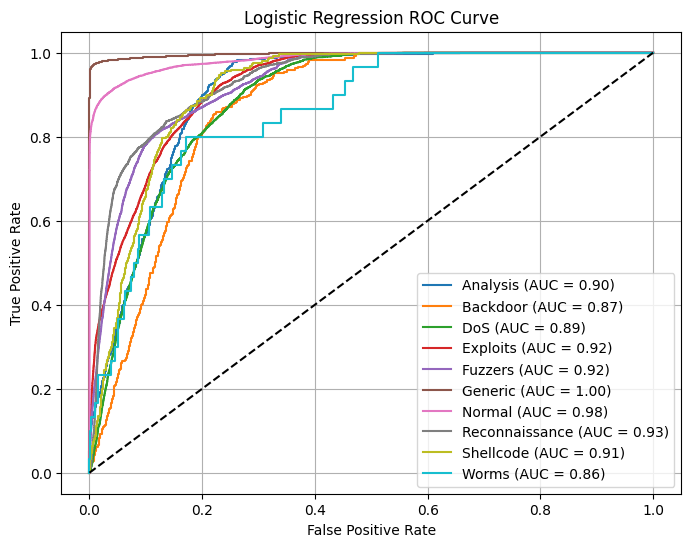

In [28]:
plot_roc('Logistic Regression')

In [29]:
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)
y_score = model.predict_proba(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.80      0.07      0.14       378
           1       0.00      0.00      0.00       349
           2       0.45      0.01      0.01      2466
           3       0.53      0.93      0.67      6760
           4       0.64      0.56      0.60      3613
           5       0.99      0.97      0.98      7962
           6       0.95      0.91      0.93     11076
           7       0.53      0.37      0.44      2185
           8       0.00      0.00      0.00       250
           9       0.00      0.00      0.00        30

    accuracy                           0.77     35069
   macro avg       0.49      0.38      0.38     35069
weighted avg       0.76      0.77      0.74     35069



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


AttributeError: This 'SVC' has no attribute 'predict_proba'

<Axes: >

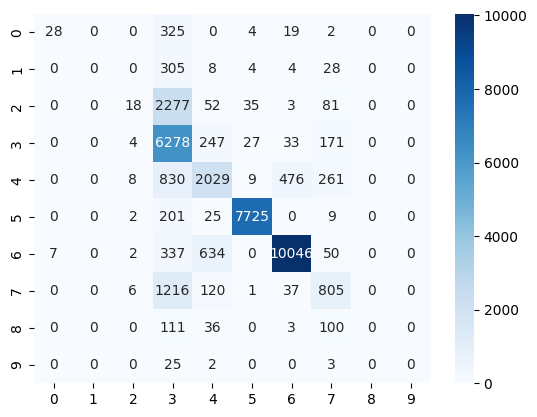

In [30]:
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')

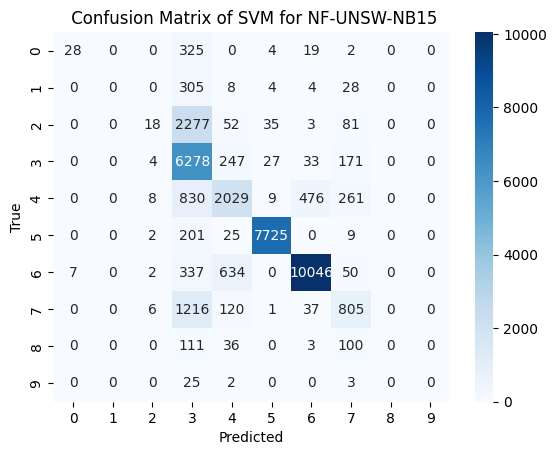

In [31]:
plot_confusion_matirix('SVM')

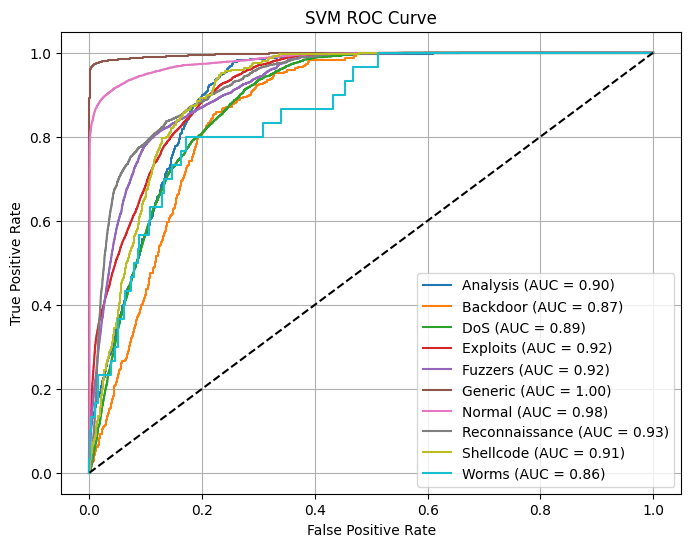

In [32]:
plot_roc('SVM')

In [33]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)
y_score = model.predict_proba(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       378
           1       0.04      0.83      0.07       349
           2       0.03      0.01      0.01      2466
           3       0.45      0.36      0.40      6760
           4       0.47      0.14      0.22      3613
           5       0.95      0.97      0.96      7962
           6       0.99      0.48      0.65     11076
           7       0.18      0.33      0.23      2185
           8       0.00      0.00      0.00       250
           9       0.00      0.00      0.00        30

    accuracy                           0.49     35069
   macro avg       0.31      0.31      0.25     35069
weighted avg       0.68      0.49      0.54     35069



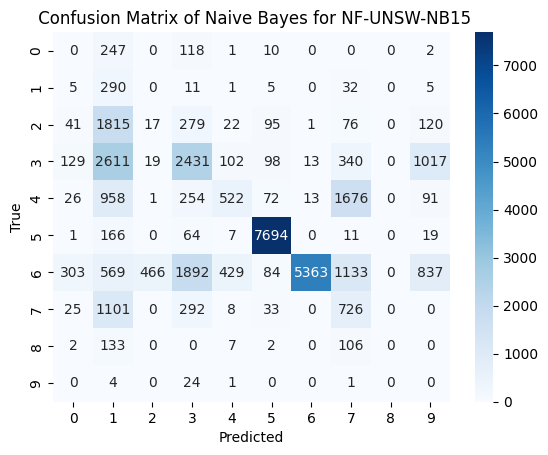

In [34]:
plot_confusion_matirix('Naive Bayes')

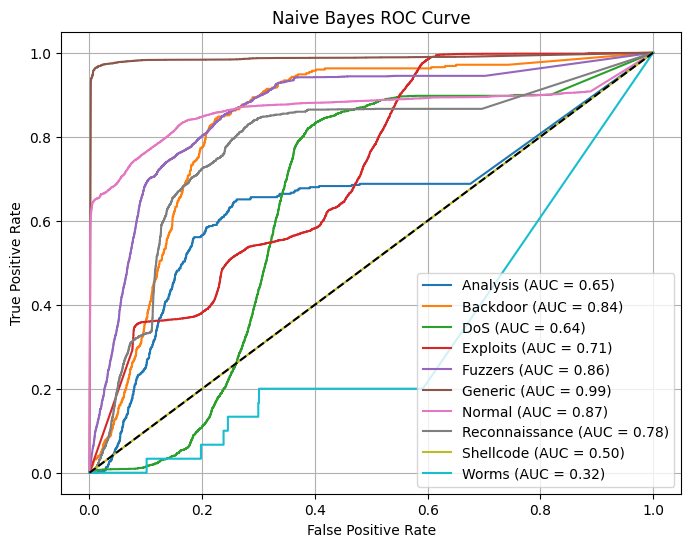

In [35]:
plot_roc('Naive Bayes')

In [36]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)
y_score = model.predict_proba(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0       0.60      0.11      0.18       378
           1       0.46      0.17      0.25       349
           2       0.31      0.08      0.13      2466
           3       0.61      0.72      0.66      6760
           4       0.45      0.83      0.58      3613
           5       1.00      0.98      0.99      7962
           6       0.99      0.96      0.97     11076
           7       0.92      0.34      0.50      2185
           8       0.45      0.42      0.43       250
           9       0.50      0.10      0.17        30

    accuracy                           0.78     35069
   macro avg       0.63      0.47      0.49     35069
weighted avg       0.80      0.78      0.77     35069



<Axes: >

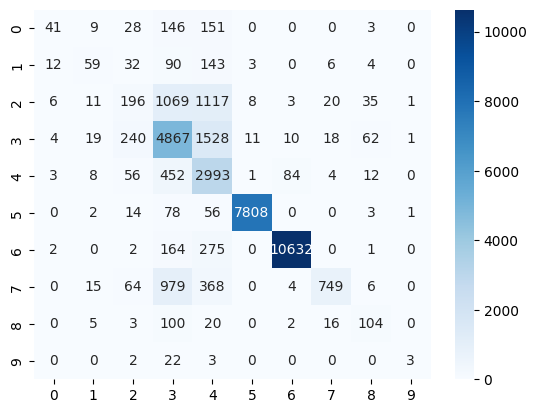

In [37]:
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues')

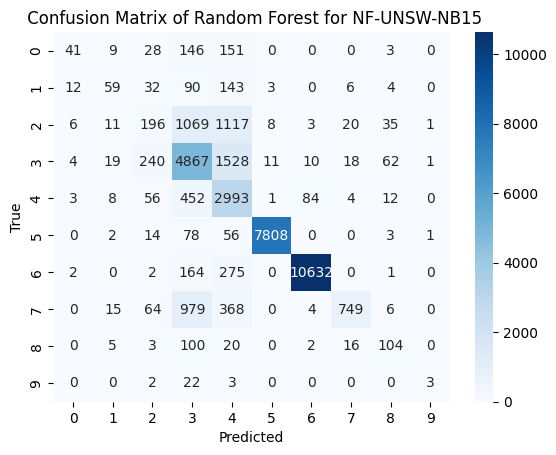

In [38]:
plot_confusion_matirix('Random Forest')

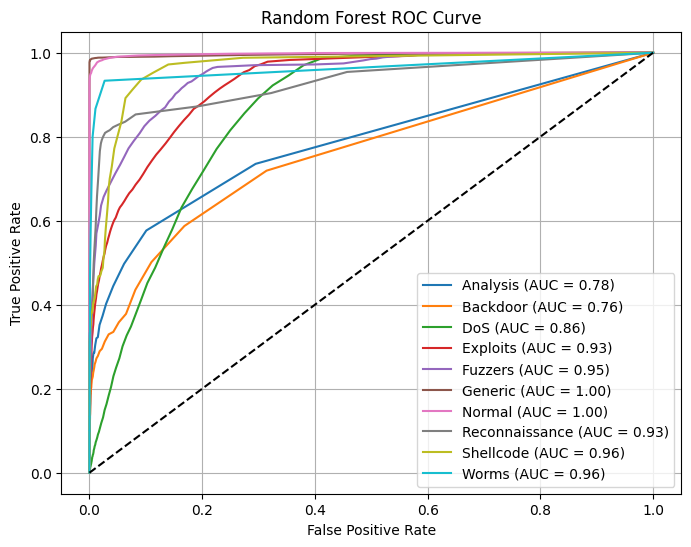

In [39]:
plot_roc('Random Forest')